In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import os

file_path = "../../datasets/original_treated.csv"

try:
    df = pd.read_csv(file_path)
    print(f"Dataset '{file_path}' carregado com sucesso.")
    print(f"Total de {df['student_id'].nunique()} alunos únicos encontrados.")
except FileNotFoundError:
    print(f"Erro: Arquivo '{file_path}' não encontrado.")
    print(f"Verifique se o caminho está correto. Diretorio atual: {os.getcwd()}")
    df = pd.DataFrame()

# Função auxiliar para agrupar categorias raras
def prepare_pie_data(data_series: pd.DataFrame, top_n=10):
    # Conta a frequência de cada categoria
    counts = data_series.value_counts()

    # Separa o Top N e o restante
    top_categories = counts.head(top_n)
    other_count = counts.iloc[top_n:].sum()

    # Se houver "Outros", adiciona ao Top N
    if other_count > 0:
        # Usamos pd.concat para adicionar a linha 'Outros'
        other_series = pd.Series([other_count], index=['Outros'])
        final_data = pd.concat([top_categories, other_series])
    else:
        final_data = top_categories

    return final_data

plt.style.use('ggplot')

Dataset '../../datasets/original_treated.csv' carregado com sucesso.
Total de 2027 alunos únicos encontrados.


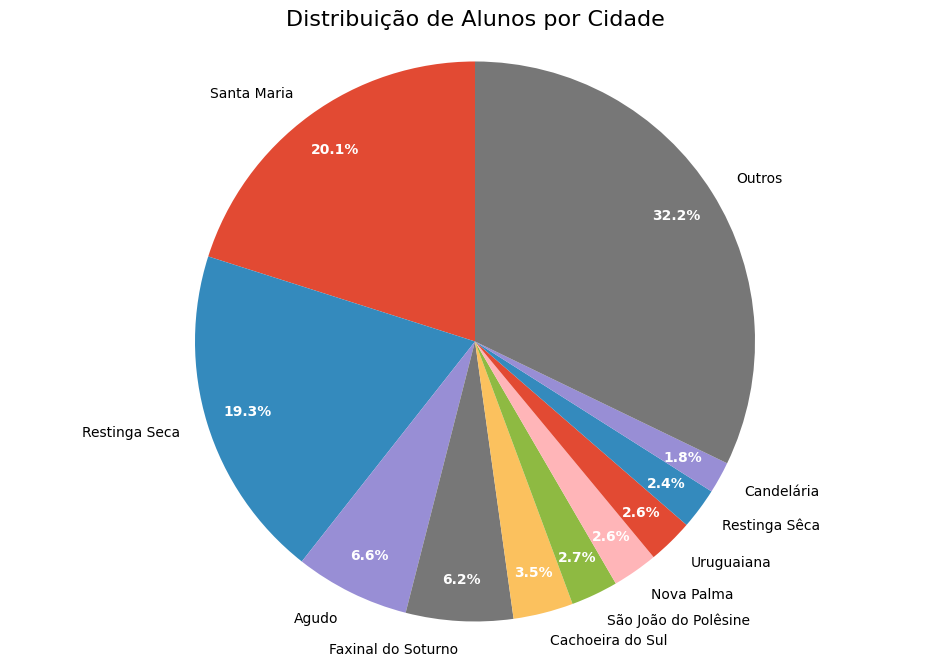

In [49]:
if not df.empty:
    df_students_city = df[['student_id', 'city']].drop_duplicates()

    data = prepare_pie_data(df_students_city['city'], top_n=10)

    plt.figure(figsize=(12, 8))

    patches, texts, autotexts = plt.pie(
        data, 
        labels=data.index, 
        autopct='%1.1f%%',
        startangle=90,
        pctdistance=0.85
    )

    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_weight('bold')

    plt.title('Distribuição de Alunos por Cidade', fontsize=16)
    plt.axis('equal')
    plt.show()

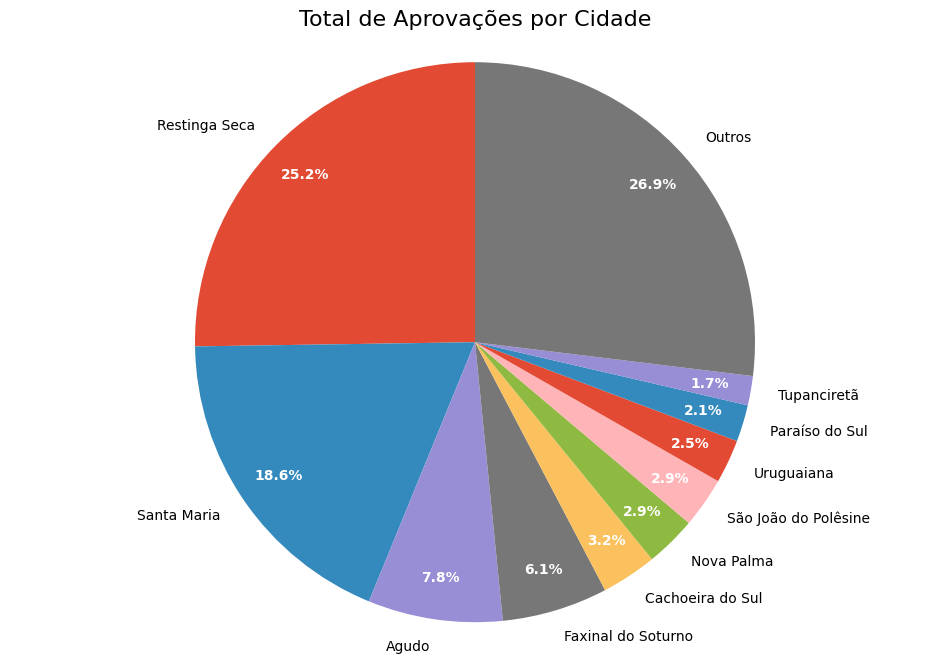

In [50]:
if not df.empty:
    df_approved = df[df['is_approved'] == 1]

    data = prepare_pie_data(df_approved['city'], top_n=10)

    plt.figure(figsize=(12, 8))

    patches, texts, autotexts = plt.pie(
        data, 
        labels=data.index, 
        autopct='%1.1f%%', 
        startangle=90,
        pctdistance=0.85
    )

    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_weight('bold')

    plt.title('Total de Aprovações por Cidade', fontsize=16)
    plt.axis('equal')
    plt.show()

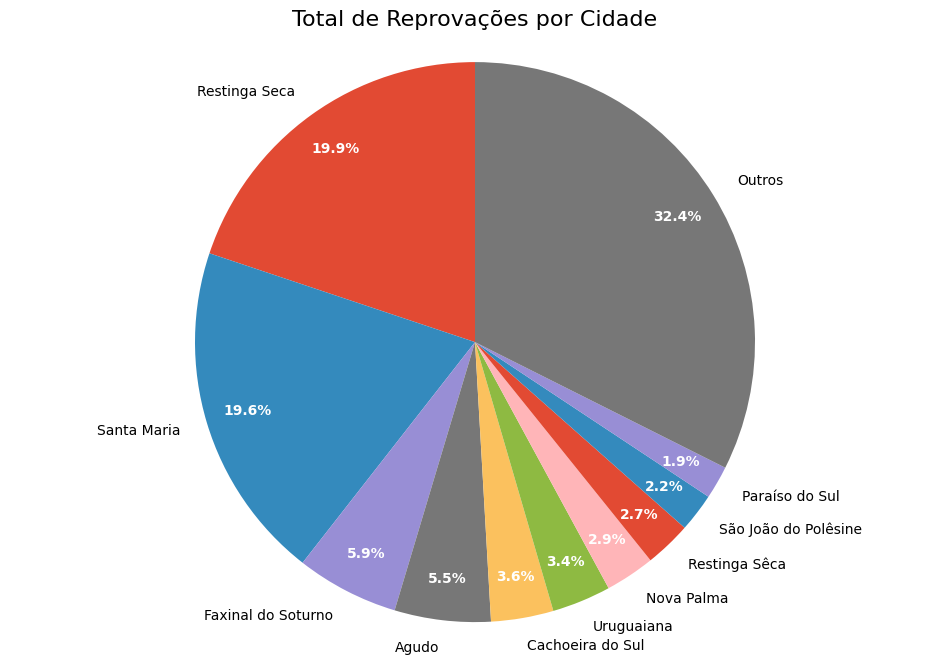

In [51]:
if not df.empty:
    df_rejected = df[df['is_approved'] == 0]

    data = prepare_pie_data(df_rejected['city'], top_n=10)

    plt.figure(figsize=(12, 8))

    patches, texts, autotexts = plt.pie(
        data, 
        labels=data.index, 
        autopct='%1.1f%%', 
        startangle=90,
        pctdistance=0.85
    )

    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_weight('bold')

    plt.title('Total de Reprovações por Cidade', fontsize=16)
    plt.axis('equal')
    plt.show()

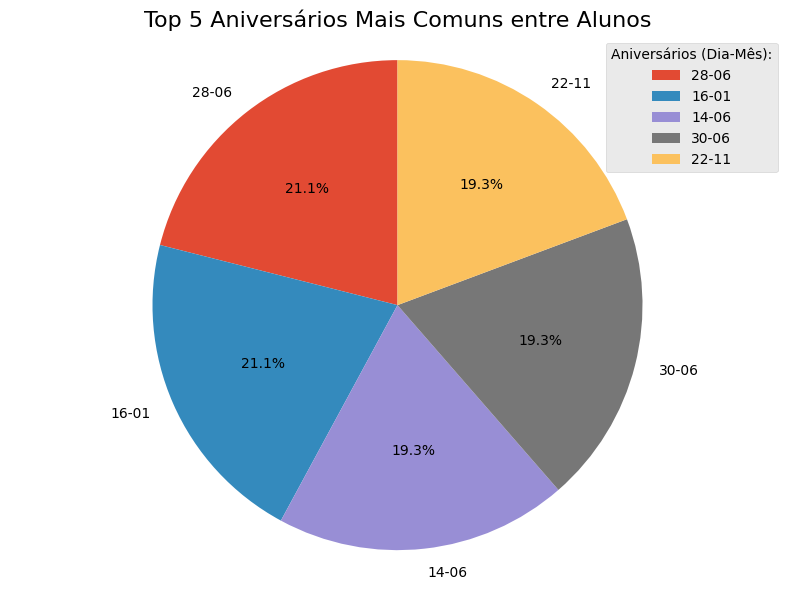

In [59]:
if not df.empty:
    TOP_BDAY_N = 5
    df['birthdate'] = pd.to_datetime(df['birthdate'], errors='coerce')

    df['aniversario_md'] = df['birthdate'].dt.strftime('%d-%m')

    df_students_bday = df[['student_id', 'aniversario_md']].drop_duplicates()

    top_x_bdays = df_students_bday['aniversario_md'].value_counts().head(TOP_BDAY_N)

    plt.figure(figsize=(10, 7))

    patches, texts, autotexts = plt.pie(
        top_x_bdays, 
        labels=top_x_bdays.index, 
        autopct='%1.1f%%',
        startangle=90
    )

    plt.title(f'Top {TOP_BDAY_N} Aniversários Mais Comuns entre Alunos', fontsize=16)
    plt.legend(title="Aniversários (Dia-Mês):", loc="best")
    plt.axis('equal')
    plt.show()


--- Top 10 Alunos com Maior Reprovação ---
student_id
100294    25
100530    24
100795    21
100677    18
101235    18
100859    17
100827    16
102706    16
101990    15
101284    15
Name: count, dtype: int64
---------------------------------------------


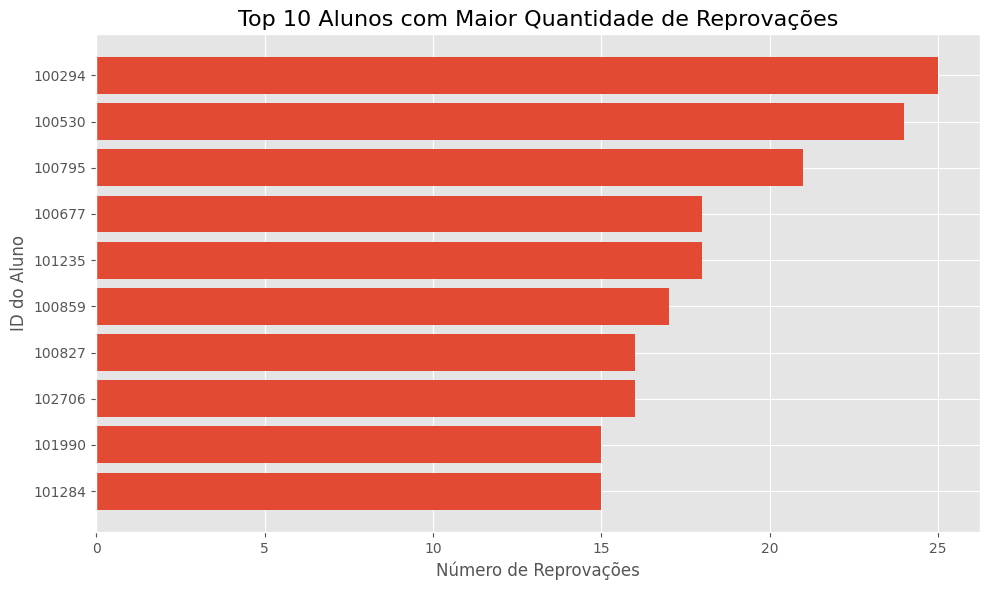

In [61]:
if not df.empty:
    TOP_X_REJECTED_STUDENTS_N = 5

    if 'df_rejected' not in locals():
        df_rejected = df[df['is_approved'] == 0]
        print("DataFrame de reprovações recalculado.")

    top_x_students = df_rejected['student_id'].value_counts().head(TOP_X_REJECTED_STUDENTS_N)

    print(f"\n--- Top {TOP_X_REJECTED_STUDENTS_N} Alunos com Maior Reprovação ---")
    print(top_x_students)
    print("---------------------------------------------")

    plt.figure(figsize=(10, 6))

    plt.barh(top_x_students.index.astype(str), top_x_students.values)

    plt.title(f'Top {TOP_X_REJECTED_STUDENTS_N} Alunos com Maior Quantidade de Reprovações', fontsize=16)
    plt.xlabel('Número de Reprovações')
    plt.ylabel('ID do Aluno')

    plt.gca().invert_yaxis()

    plt.tight_layout()
    plt.show()


--- Top 15 Disciplinas com Maior Reprovação ---
discipline
Língua Inglesa II                            190
Língua Inglesa I                             160
Direito Civil I                              154
Direito Constitucional I                     143
Metodologia Científica                       142
Estrutura de Dados                           107
Trabalho de Conclusão de Curso               106
Direito Ambiental                            100
Direito Processual Civil I                    93
Competência Competitiva no Direito            92
Língua Inglesa IV                             87
Língua Inglesa III                            86
Comunicação e Linguagem Jurídica              82
Organização e Arquitetura de Computadores     77
Direito Processual Civil V                    76
Name: count, dtype: int64
-------------------------------------------------


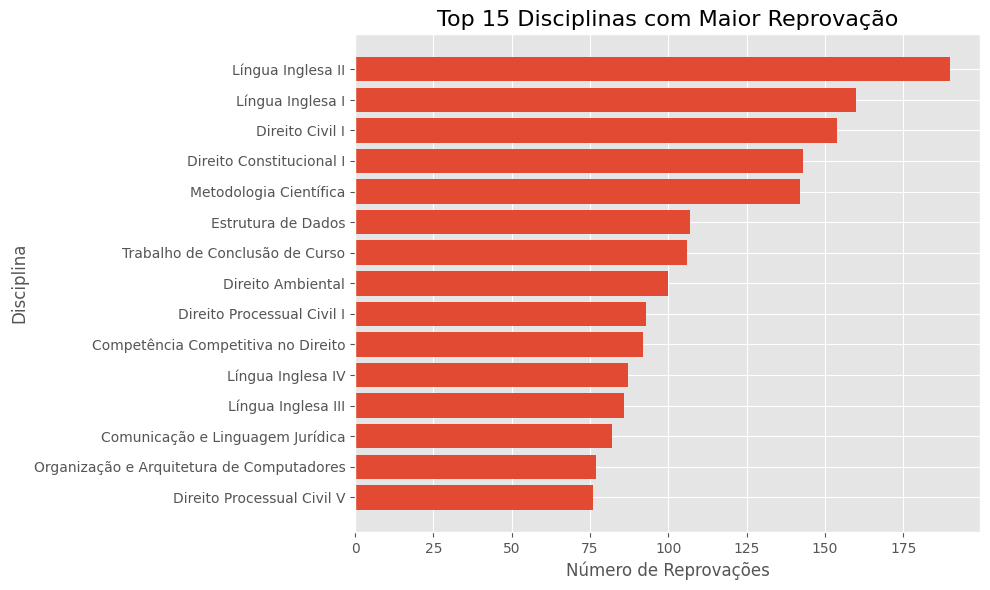

In [67]:
if not df.empty:
    discipline_col = 'discipline'
    TOP_X_REPROVAL_DISCIPLINES_N = 15
    df_rejected = df[df['is_approved'] == 0]

    top_x_disciplines = df_rejected[discipline_col].value_counts().head(TOP_X_REPROVAL_DISCIPLINES_N)

    print(f"\n--- Top {TOP_X_REPROVAL_DISCIPLINES_N} Disciplinas com Maior Reprovação ---")
    print(top_x_disciplines)
    print("-------------------------------------------------")

    plt.figure(figsize=(10, 6))

    plt.barh(top_x_disciplines.index, top_x_disciplines.values)

    plt.title(f'Top {TOP_X_REPROVAL_DISCIPLINES_N} Disciplinas com Maior Reprovação', fontsize=16)
    plt.xlabel('Número de Reprovações')
    plt.ylabel('Disciplina')

    plt.gca().invert_yaxis() 

    plt.tight_layout()
    plt.show()


--- Top 15 Disciplinas com Maior Reprovação em Sistemas de Informação (Curso 5) ---
discipline
Estrutura de Dados                                   107
Organização e Arquitetura de Computadores             77
Laboratório de Algoritmos I                           62
Competência Competitiva no Universo da Tecnologia     58
Programação Orientada a Objetos                       54
Probabilidade e Estatística                           53
Língua Inglesa II                                     46
Laboratório de Algoritmos II                          44
Redes de Computadores                                 44
Engenharia de Software                                43
Fundamentos de Economia e Administração               42
Cálculo Numérico                                      41
Banco de Dados Aplicado                               39
Fundamentos de Sistemas de Informação                 38
Psicologia e Dinâmica Empresarial                     37
Name: count, dtype: int64
-----------------------

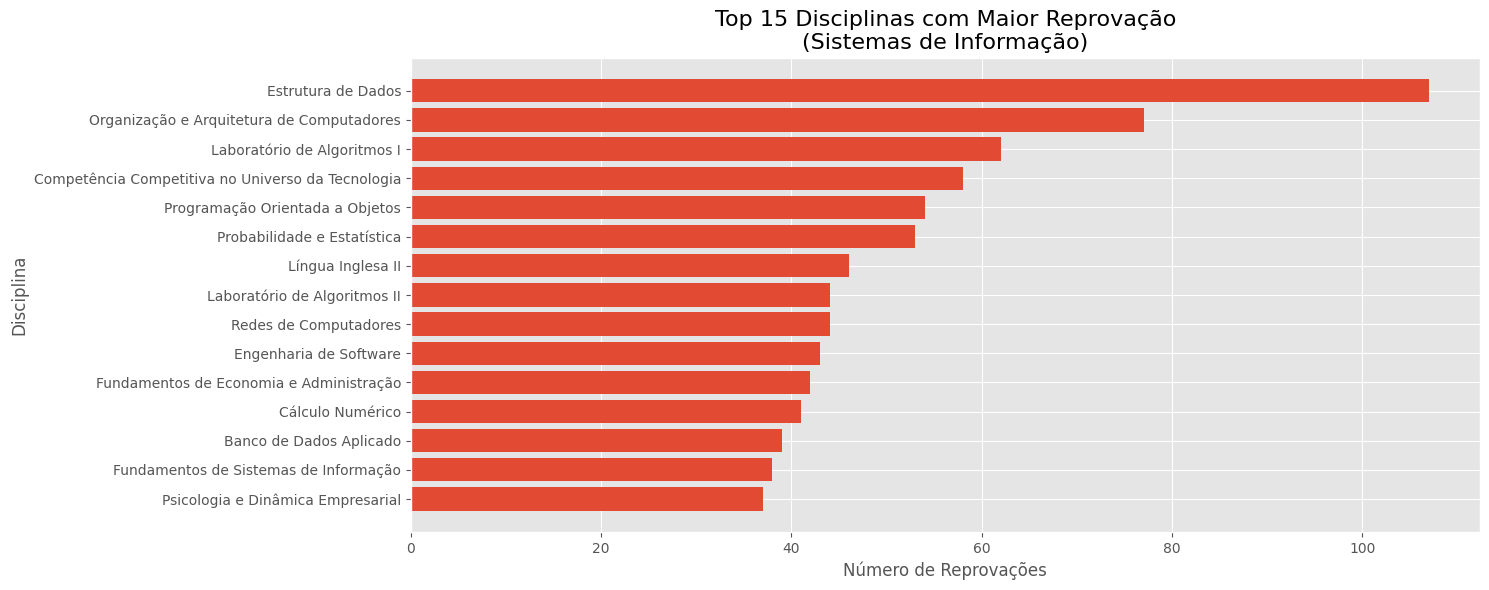

In [66]:
if not df.empty:
    DISCIPLINES_N = 15
    COURSE_ID_TO_FILTER = 5
    COURSE_NAME = "Sistemas de Informação"

    df_course = df[df['course'] == COURSE_ID_TO_FILTER]

    if df_course.empty:
        print(f"Nenhum dado encontrado para o curso ID {COURSE_ID_TO_FILTER} ({COURSE_NAME}).")

    else:
        df_rejected = df_course[df_course['is_approved'] == 0]

        top_x_disciplines = df_rejected['discipline'].value_counts().head(DISCIPLINES_N)

        if top_x_disciplines.empty:
            print(f"Não há reprovações registradas para o curso {COURSE_NAME}.")

        else:
            print(f"\n--- Top {DISCIPLINES_N} Disciplinas com Maior Reprovação em {COURSE_NAME} (Curso {COURSE_ID_TO_FILTER}) ---")
            print(top_x_disciplines)
            print("-------------------------------------------------")

            plt.figure(figsize=(DISCIPLINES_N, 6))
            plt.barh(top_x_disciplines.index, top_x_disciplines.values)

            plt.title(f'Top {DISCIPLINES_N} Disciplinas com Maior Reprovação\n({COURSE_NAME})', fontsize=16)

            plt.xlabel('Número de Reprovações')
            plt.ylabel('Disciplina')
            plt.gca().invert_yaxis() 
            plt.tight_layout()
            plt.show()


--- Contagem de Alunos Únicos por Curso ---
course
3    781
4    465
5    290
2    276
1    137
7    121
6     33
8     29
9      1
Name: student_id, dtype: int64
---------------------------------------------


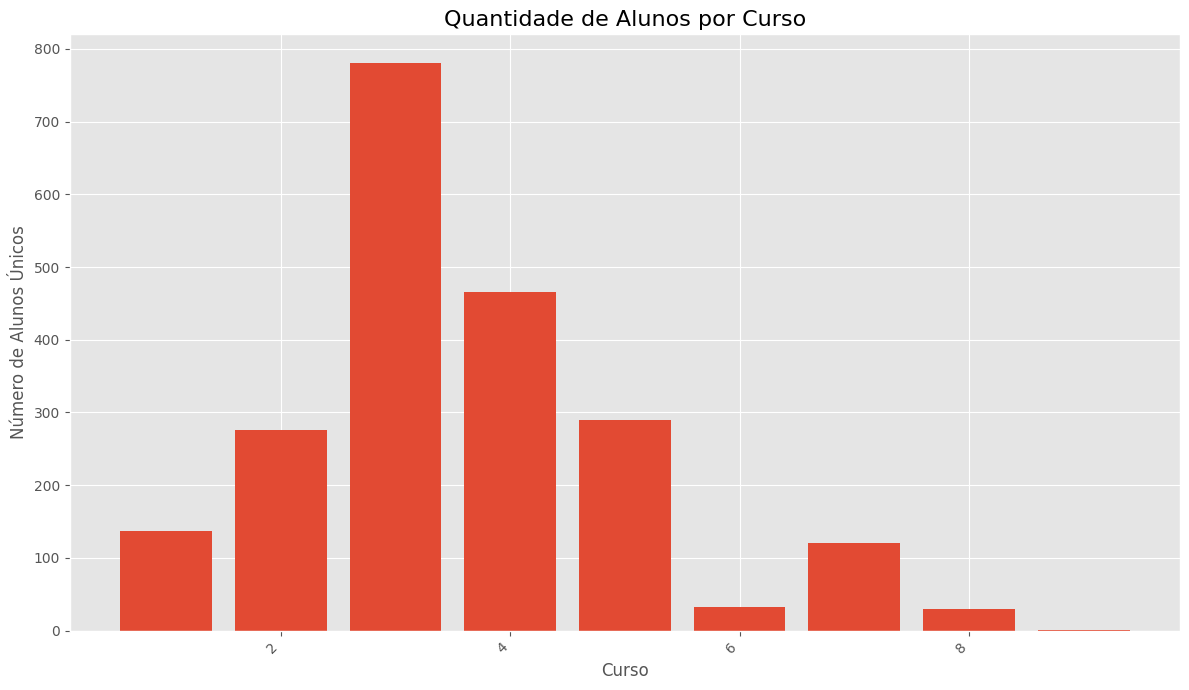

'\n1 ciencias contabeis\n2 ontopsicologia\n3 direito\n4 administracao\n5 sistemas de informacao\n6 hotelaria\n7 pedagogia\n8 gastronomia\n\n'

In [56]:
if not df.empty:
    course_students = df.groupby('course')['student_id'].nunique().sort_values(ascending=False)

    print("\n--- Contagem de Alunos Únicos por Curso ---")
    print(course_students)
    print("---------------------------------------------")

    plt.figure(figsize=(12, 7))

    plt.bar(course_students.index, course_students.values)

    plt.title('Quantidade de Alunos por Curso', fontsize=16)
    plt.ylabel('Número de Alunos Únicos')
    plt.xlabel('Curso')

    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

"""
1 ciencias contabeis
2 ontopsicologia
3 direito
4 administracao
5 sistemas de informacao
6 hotelaria
7 pedagogia
8 gastronomia

"""